In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [76]:
df = pd.read_csv('../../datasets/parte1/dataset_cleaned.csv')

In [77]:
X = df.drop(['EncodedRainTomorrow'], axis=1)
y = df['EncodedRainTomorrow'].to_frame()

In [78]:
# Assuming X and y are your feature matrix and target variable, respectively
df = pd.concat([X, y], axis=1)
minority_class = df[df['EncodedRainTomorrow'] == 0]
majority_class = df[df['EncodedRainTomorrow'] == 1]

# Determine the size of the majority class
majority_size = len(majority_class)

# Undersample the minority class to match the size of the majority class
undersampled_minority = resample(minority_class, replace=False, n_samples=majority_size, random_state=42)

# Combine the majority class and the undersampled minority class
balanced_df = pd.concat([majority_class, undersampled_minority])

# Split the balanced dataset back into X and y
X_balanced = balanced_df.drop('EncodedRainTomorrow', axis=1)
y_balanced = balanced_df['EncodedRainTomorrow']


X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.25, random_state=2023)





In [79]:
"""param_grid = {
    'criterion': ['gini', 'entropy','ratio'],
    'max_depth': [5,7,9,11,13,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}"""

clf = DecisionTreeClassifier(random_state=2023)

In [80]:
clf.fit(X_train, y_train)

# Use GridSearchCV para encontrar os melhores hiperparâmetros
#grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,refit=True, verbose=2)
#grid_search.fit(X, y)

#descobriu os melhores parametros

#clf = grid_search.best_estimator_

DecisionTreeClassifier(random_state=2023)

In [81]:
predictions = clf.predict(X_test)


In [82]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.72 accuracy


In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6883
           1       0.72      0.72      0.72      6813

    accuracy                           0.72     13696
   macro avg       0.72      0.72      0.72     13696
weighted avg       0.72      0.72      0.72     13696



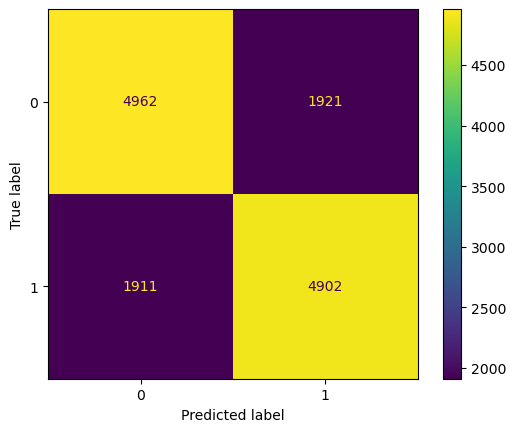

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

## Cross Validation

In [85]:
clf = DecisionTreeClassifier(random_state=2023)

scores = cross_val_score(clf, X, y, cv=5)

print(scores.mean())

0.7411688626626789
